In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
import random

In [2]:
def m(size):
    # generate float number between 1 and 3 with size len(m)
    return np.random.uniform(1,3,size) * u.M_sun

In [14]:
# Generating dataset
size = 10000

m1_lst = []
m2_lst = []

while len(m1_lst) < size:
    m1 = m(1)
    m2 = m(1)
    # if m1 > m2:
    m1_lst.append(m1)
    m2_lst.append(m2)
        
m1 = np.array(m1_lst) * u.M_sun
m2 = np.array(m2_lst) * u.M_sun

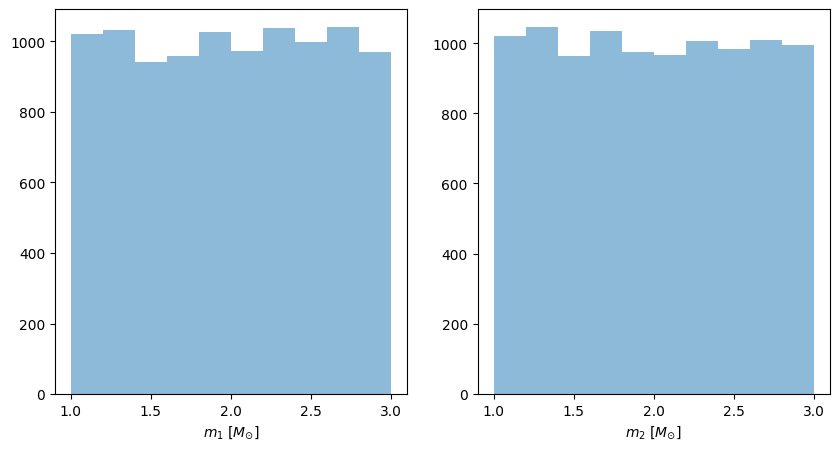

In [15]:
# two plots side by side
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(m1, bins=10, alpha=0.5, label='m1')
plt.xlabel(r'$m_1$ $[M_{\odot}]$')
plt.subplot(1,2,2)
plt.hist(m2, bins=10, alpha=0.5, label='m1')
plt.xlabel(r'$m_2$ $[M_{\odot}]$')
plt.savefig('histogram_BNS.png')

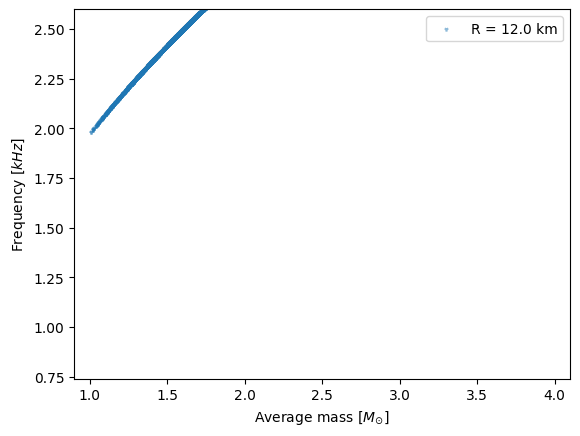

In [16]:
from astropy.constants import G

for a_val in [12]:
    a = a_val * u.km
    num = (4*np.pi**2) * a**3
    dem = G*(m1+m2)
    P = np.sqrt(num/dem)
    f_kepler = (1/P).to(u.Hz)
    m_avg = (m1+m2)/2
    
    lower = np.percentile(f_kepler, 5)
    upper = np.percentile(f_kepler, 95)
    median = np.percentile(f_kepler, 50)
    mean = np.mean(f_kepler)
    
    plt.scatter(m_avg, f_kepler.to(u.kHz), alpha=0.5, s=10, marker = "1", label = f"R = {a}")
plt.ylim(0.74, 2.6)
plt.xlim(0.9, 4.1)
plt.xlabel(r'Average mass $[M_{\odot}]$')
plt.ylabel(r'Frequency $[kHz]$')
plt.legend()
plt.savefig('contact_BNS.png')

In [24]:
# write to text file using numpy
np.savetxt('contact_BNS.txt', (m1.squeeze(), m2.squeeze(), m_avg.squeeze(), f_kepler.squeeze()), header='m1 m2 m_avg f_kepler')